# **Web Scraping Task 1 : Using Selenium/BS4 to Automate Navigation and Web Scraping**

### **Background** ###
This notebook provides a step by step guide to web scraping HTML content. We will utilize both Selenium and BeautifulSoup (BS4) to automate the process of navigating websites and handling dynamic JavaScript content. 
<br>

In this example, we’ll demonstrate how to scrape today's and tomorrow's AU/NZ gallops horse race data from www.swiftbet.com.au

### **Step by Step Guide** ###
The steps outlined below will guide you through the entire process:
<br>

1) **Imports :** Importing the relevant libraries, and adding the relevant settings for our selenium driver. Some may require pip installs. 

2) **Initialise Selenium :** Load the selenium driver and navigate to todays racing page on SwiftBet

3) **Scrape HTML :** Scrape todays horse race data from www.swiftbet.com.au

4) **Parse JSON Response :** Parse through the relevant data in order to extract data in list format.

5) **Construct First DataFrame :** Construct a DataFrame using the lists we have formed.

6) **Navigate Through Website :** Using selenium navigate to tomorrows races.

7) **Repeat Steps for Tomorrows Races:** Repeat steps 3-5 for tomorrows races.

8) **Join DataFrames :** Concatenate and format our composite DataFrame

9) **Export DataFrame :** Export our DataFrame as .CSV file.
<br>

By the end of this notebook, you will have a clear understanding of how to scrape and process web data, even from complex sites with dynamic content.  

In [23]:
#Importing relevant libraries, some of which may pip installs 
from selenium import webdriver 
from selenium.webdriver.common.by import By  
from selenium.webdriver.chrome.options import Options 
from bs4 import BeautifulSoup 
import pandas as pd 
from datetime import datetime, timedelta 

In [24]:
# Initialising selenium and adding optional settings
options = Options()
#options.add_argument("--headless") #Ran without headless mode as it wasn't loading elements properly
options.add_argument("--disable-gpu")  # Disables GPU hardware acceleration
options.add_argument("--no-sandbox")   # Bypasses OS security model
options.add_argument("--disable-dev-shm-usage")  # Overcome limited resource problems
driver = webdriver.Chrome(options = options) # Using Chrome as web driver 
site =  "https://www.swiftbet.com.au" # Swiftbets URL
driver.get(site) # Accessing site with selenium
driver.implicitly_wait(30) # Waiting for JavaScript elements to load/render

In [33]:
# Clicking on the link to the racing page 
racing_button = driver.find_element(By.XPATH, "//div[contains(text(), 'Racing')]")
racing_button.click()
driver.implicitly_wait(30)

In [34]:
# Initialise BeautifulSoup with the page source
current_url = driver.current_url
page_source = driver.page_source
soup_today = BeautifulSoup(page_source, 'html.parser')

<html class="no-js wf-proximanova-n7-active wf-proximanova-n6-active wf-proximanova-i4-active wf-proximanova-n4-active wf-active" data-react-helmet="lang" lang="en" style="--sidebarheight: 622.734375px; --window-vh: 6.38px; --burger-color: white; --burger-opacity-hover: 0.9; --burger-scale: 0.6; --burger-margin-top: 25px; --burger-margin-left: 25px;"><head><script src="https://api.swiftbet.com.au/api/v2/pusher/auth?callback=Pusher.auth_callbacks%5B'1'%5D&amp;socket_id=21868.6466131&amp;channel_name=private-user_undefined"></script><meta content="A/kargTFyk8MR5ueravczef/wIlTkbVk1qXQesp39nV+xNECPdLBVeYffxrM8TmZT6RArWGQVCJ0LRivD7glcAUAAACQeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IkRpc2FibGVUaGlyZFBhcnR5U3RvcmFnZVBhcnRpdGlvbmluZzIiLCJleHBpcnkiOjE3NDIzNDIzOTksImlzU3ViZG9tYWluIjp0cnVlLCJpc1RoaXJkUGFydHkiOnRydWV9" http-equiv="origin-trial"/><script async="" src="https://app.posthog.com/static/array.js" type="text/javascript"></script><script async="" src="https://static.ads
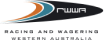
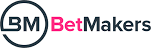

In [35]:
# Checking the output is correct
print(soup_today)

In [36]:
# Getting urls for todays gallops races in au/nz

# Initialise list 
race_links_today = []

# Loop through <a> elements in the html and parse them
for link in soup_today.find_all('a', href=True):
    href = link['href']
    if '/racing/gallops/' in href :
        race_links_today.append(href)

# Check results 
print(race_links_today)


['https://swiftbet.com.au//racing/gallops/northam/race-1-1837160-1076943', 'https://swiftbet.com.au//racing/gallops/northam/race-2-1837163-1076943', 'https://swiftbet.com.au//racing/gallops/northam/race-3-1837170-1076943', 'https://swiftbet.com.au//racing/gallops/northam/race-4-1837174-1076943', 'https://swiftbet.com.au//racing/gallops/northam/race-5-1837182-1076943', 'https://swiftbet.com.au//racing/gallops/northam/race-6-1837189-1076943', 'https://swiftbet.com.au//racing/gallops/northam/race-7-1837194-1076943', 'https://swiftbet.com.au//racing/gallops/northam/race-8-1837202-1076943', 'https://swiftbet.com.au//racing/gallops/coffs-harbour/race-1-1837906-1077010', 'https://swiftbet.com.au//racing/gallops/coffs-harbour/race-2-1837907-1077010', 'https://swiftbet.com.au//racing/gallops/coffs-harbour/race-3-1837912-1077010', 'https://swiftbet.com.au//racing/gallops/coffs-harbour/race-4-1837917-1077010', 'https://swiftbet.com.au//racing/gallops/coffs-harbour/race-5-1837922-1077010', 'https:

In [37]:
# Extracting todays race start time information

# Extract race elements
race_elements_today = driver.find_elements(By.CSS_SELECTOR, 'a.e15267q12')

# Initialise list
race_countdown_today = []

# Loop through elements in order to get race url 
for race in race_elements_today:
    race_url = race.get_attribute('href')
    
    # Check if the race URL indicates it's a gallops race
    if "gallops" in race_url:
        # Get the time until the race starts and append to list
        time_element = race.find_element(By.CSS_SELECTOR, 'div.e4bxrfe0')
        race_time = time_element.text.strip()
        race_countdown_today.append(race_time)

print(race_countdown_today)

['5/2/1/6', '1/5/7/2', '10/11/4/2', '8/6/13/5', '3/11/15/2', '1/9/6/4', '11m', '46m', '1/3/7/8', '2/4/6/8', '3/9/7/6', '7/1/3/8', '2/5/8/6', '1/2/4/5', '15/3/5/17', '2/10/5/11', '3/6/10/8', '1/14/9/3', '7/5/9/4', '10/7/8/4', '8/7/6/1', '2/15/1/3', '4/3/9/10', '6/1/11/10', '6/4/1/3', '5/3/13/9', '1/16/5/7', '9/7/1/3', '1/7/6/5', '6/8/7/11', '11/2/3/9', '1/5/14/7', '5/9/7/10', '6/3/7/2', '13/9/11/12', '6/7/2/8', '1/2/7/6', '10/5/1/2', '12/3/10/6', '1/5/14/6', '3/1/12/9']


In [38]:
# Extract todays race locations by splitting url and using '/' as delimiter 

# Intitialise list 
race_locations_today = []

# Loop through urls to extract race locations 
for link in race_links_today : 
    location = link.split('/')[6].upper()
    race_locations_today.append(location)

# Check results 
print(race_locations_today)

['NORTHAM', 'NORTHAM', 'NORTHAM', 'NORTHAM', 'NORTHAM', 'NORTHAM', 'NORTHAM', 'NORTHAM', 'COFFS-HARBOUR', 'COFFS-HARBOUR', 'COFFS-HARBOUR', 'COFFS-HARBOUR', 'COFFS-HARBOUR', 'COFFS-HARBOUR', 'COFFS-HARBOUR', 'WAGGA', 'WAGGA', 'WAGGA', 'WAGGA', 'WAGGA', 'WAGGA', 'WAGGA', 'WAGGA', 'MACKAY', 'MACKAY', 'MACKAY', 'MACKAY', 'MACKAY', 'MACKAY', 'MACKAY', 'MACKAY', 'MACKAY', 'CRANBOURNE', 'CRANBOURNE', 'CRANBOURNE', 'CRANBOURNE', 'CRANBOURNE', 'CRANBOURNE', 'CRANBOURNE', 'CRANBOURNE', 'CRANBOURNE']


In [39]:
#Extract todays race numbers by splitting url and using '/' as delimiter

# Initialise list 
race_numbers_today = []

# Loop through urls to extract race numbers 
for link in race_links_today :
    number = link.split('/')[7].split('-')[1]
    race_number = f'Race {number}'
    race_numbers_today.append(race_number)

# Check results 
print(race_numbers_today)

['Race 1', 'Race 2', 'Race 3', 'Race 4', 'Race 5', 'Race 6', 'Race 7', 'Race 8', 'Race 1', 'Race 2', 'Race 3', 'Race 4', 'Race 5', 'Race 6', 'Race 7', 'Race 1', 'Race 2', 'Race 3', 'Race 4', 'Race 5', 'Race 6', 'Race 7', 'Race 8', 'Race 1', 'Race 2', 'Race 3', 'Race 4', 'Race 5', 'Race 6', 'Race 7', 'Race 8', 'Race 9', 'Race 1', 'Race 2', 'Race 3', 'Race 4', 'Race 5', 'Race 6', 'Race 7', 'Race 8', 'Race 9']


In [40]:
# Checking if all strings are the same length 
if len(race_links_today) == len(race_locations_today) == len(race_numbers_today) == len(race_countdown_today): 
    print('All lists are same length')
else : 
    print('List lengths are not the same length')

All lists are same length


In [41]:
# Make DataFrame for todays race information 
today_date = datetime.now().date()
today_gallops_df = pd.DataFrame({
    'URL' : race_links_today, 
    'Location' : race_locations_today, 
    'Race Number' : race_numbers_today, 
    'Date' : today_date, 
   'Race Countdown' : race_countdown_today})
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
print(today_gallops_df)


                                                  URL       Location  \
0   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
1   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
2   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
3   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
4   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
5   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
6   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
7   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
8   https://swiftbet.com.au//racing/gallops/coffs-...  COFFS-HARBOUR   
9   https://swiftbet.com.au//racing/gallops/coffs-...  COFFS-HARBOUR   
10  https://swiftbet.com.au//racing/gallops/coffs-...  COFFS-HARBOUR   
11  https://swiftbet.com.au//racing/gallops/coffs-...  COFFS-HARBOUR   
12  https://swiftbet.com.au//racing/gallops/coffs-...  COFFS-HAR

In [45]:
#Click the link for tomorrows days races 
tomorrow_button = driver.find_element(By.CSS_SELECTOR, "button[data-fs-title='page:racing-tab:tomorrow-header_bar']")
tomorrow_button.click()
driver.implicitly_wait(10)

In [46]:
# Initialise BeautifulSoup with the page source
current_url = driver.current_url
page_source = driver.page_source
soup_tomorrow = BeautifulSoup(page_source, 'html.parser')

In [48]:
# Getting urls for tomorrows gallops races in au/nz

# Initialise list 
race_links_tomorrow = []

# Loop through <a> elements in the html and parse them
for link in soup_tomorrow.find_all('a', href=True):
    href = link['href']
    if '/racing/gallops/' in href :
        race_links_tomorrow.append(href)

# Check results 
print(race_links_tomorrow)

['https://swiftbet.com.au//racing/gallops/mornington/race-1-1839307-1077148', 'https://swiftbet.com.au//racing/gallops/mornington/race-2-1839319-1077148', 'https://swiftbet.com.au//racing/gallops/mornington/race-3-1839333-1077148', 'https://swiftbet.com.au//racing/gallops/mornington/race-4-1839341-1077148', 'https://swiftbet.com.au//racing/gallops/mornington/race-5-1839345-1077148', 'https://swiftbet.com.au//racing/gallops/mornington/race-6-1839349-1077148', 'https://swiftbet.com.au//racing/gallops/mornington/race-7-1839352-1077148', 'https://swiftbet.com.au//racing/gallops/mornington/race-8-1839354-1077148', 'https://swiftbet.com.au//racing/gallops/mornington/race-9-1839357-1077148', 'https://swiftbet.com.au//racing/gallops/mornington/race-10-1839358-1077148', 'https://swiftbet.com.au//racing/gallops/birdsville/race-1-1838017-1077028', 'https://swiftbet.com.au//racing/gallops/birdsville/race-2-1838026-1077028', 'https://swiftbet.com.au//racing/gallops/birdsville/race-3-1838035-1077028

In [49]:
# Extracting tomorrows race start time information

# Extract race elements
race_elements_tomorrow = driver.find_elements(By.CSS_SELECTOR, 'a.e15267q12')

# Initialise list
race_countdown_tomorrow = []

# Loop through elements in order to get race url 
for race in race_elements_tomorrow:
    race_url = race.get_attribute('href')
    
    # Check if the race URL indicates it's a gallops race
    if "gallops" in race_url:
        # Get the time until the race starts and append to list
        time_element = race.find_element(By.CSS_SELECTOR, 'div.e4bxrfe0')
        race_time = time_element.text.strip()
        race_countdown_tomorrow.append(race_time)

# Check Results 
print(race_countdown_tomorrow)

['17h 42m', '18h 12m', '18h 42m', '19h 12m', '19h 42m', '20h 12m', '20h 42m', '21h 12m', '21h 42m', '22h 12m', '18h 46m', '19h 24m', '19h 59m', '20h 39m', '21h 16m', '21h 54m', '18h 2m', '18h 37m', '19h 17m', '19h 52m', '20h 32m', '21h 7m', '21h 47m', '22h 22m', '17h 47m', '18h 22m', '18h 57m', '19h 37m', '20h 17m', '20h 52m', '21h 27m', '22h 7m']


In [50]:
# Extract tomorrows race locations by splitting url and using '/' as delimiter 

# Intitialise list 
race_locations_tomorrow = []

# Loop through urls to extract race locations 
for link in race_links_tomorrow : 
    location = link.split('/')[6].upper()
    race_locations_tomorrow.append(location)

# Check results 
print(race_locations_tomorrow)

['MORNINGTON', 'MORNINGTON', 'MORNINGTON', 'MORNINGTON', 'MORNINGTON', 'MORNINGTON', 'MORNINGTON', 'MORNINGTON', 'MORNINGTON', 'MORNINGTON', 'BIRDSVILLE', 'BIRDSVILLE', 'BIRDSVILLE', 'BIRDSVILLE', 'BIRDSVILLE', 'BIRDSVILLE', 'WYONG', 'WYONG', 'WYONG', 'WYONG', 'WYONG', 'WYONG', 'WYONG', 'WYONG', 'CANBERRA', 'CANBERRA', 'CANBERRA', 'CANBERRA', 'CANBERRA', 'CANBERRA', 'CANBERRA', 'CANBERRA']


In [51]:
#Extract tomorrows race numbers by splitting url and using '/' as delimiter

# Initialise list 
race_numbers_tomorrow = []

# Loop through urls to extract race numbers 
for link in race_links_tomorrow :
    number = link.split('/')[7].split('-')[1]
    race_number = f'Race {number}'
    race_numbers_tomorrow.append(race_number)

# Check results 
print(race_numbers_tomorrow)

['Race 1', 'Race 2', 'Race 3', 'Race 4', 'Race 5', 'Race 6', 'Race 7', 'Race 8', 'Race 9', 'Race 10', 'Race 1', 'Race 2', 'Race 3', 'Race 4', 'Race 5', 'Race 6', 'Race 1', 'Race 2', 'Race 3', 'Race 4', 'Race 5', 'Race 6', 'Race 7', 'Race 8', 'Race 1', 'Race 2', 'Race 3', 'Race 4', 'Race 5', 'Race 6', 'Race 7', 'Race 8']


In [52]:
# Checking if all strings are the same length 
if len(race_links_tomorrow) == len(race_locations_tomorrow) == len(race_numbers_tomorrow) == len(race_countdown_tomorrow): 
    print('All lists are same length')

else : 
    print('List lengths are not the same')

All lists are same length


In [53]:
# Make DataFrame for todays race information 
tomorrow_date = datetime.now().date() +timedelta(days=1)
tomorrow_gallops_df = pd.DataFrame({
    'URL' : race_links_tomorrow, 
    'Location' : race_locations_tomorrow, 
    'Race Number' : race_numbers_tomorrow, 
    'Date' : tomorrow_date, 
   'Race Countdown' : race_countdown_tomorrow})
print(tomorrow_gallops_df)

                                                  URL    Location Race Number  \
0   https://swiftbet.com.au//racing/gallops/mornin...  MORNINGTON      Race 1   
1   https://swiftbet.com.au//racing/gallops/mornin...  MORNINGTON      Race 2   
2   https://swiftbet.com.au//racing/gallops/mornin...  MORNINGTON      Race 3   
3   https://swiftbet.com.au//racing/gallops/mornin...  MORNINGTON      Race 4   
4   https://swiftbet.com.au//racing/gallops/mornin...  MORNINGTON      Race 5   
5   https://swiftbet.com.au//racing/gallops/mornin...  MORNINGTON      Race 6   
6   https://swiftbet.com.au//racing/gallops/mornin...  MORNINGTON      Race 7   
7   https://swiftbet.com.au//racing/gallops/mornin...  MORNINGTON      Race 8   
8   https://swiftbet.com.au//racing/gallops/mornin...  MORNINGTON      Race 9   
9   https://swiftbet.com.au//racing/gallops/mornin...  MORNINGTON     Race 10   
10  https://swiftbet.com.au//racing/gallops/birdsv...  BIRDSVILLE      Race 1   
11  https://swiftbet.com.au/

In [54]:
# Quitting the selenium driver 
driver.quit()

In [55]:
# Concatenating both of the DataFrames 
swiftbet_gallops_df = pd.concat([today_gallops_df, tomorrow_gallops_df])
swiftbet_gallops_df.reset_index(drop=True, inplace=True)
pd.set_option('display.max_columns', None)
print(swiftbet_gallops_df)

                                                  URL       Location  \
0   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
1   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
2   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
3   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
4   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
5   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
6   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
7   https://swiftbet.com.au//racing/gallops/northa...        NORTHAM   
8   https://swiftbet.com.au//racing/gallops/coffs-...  COFFS-HARBOUR   
9   https://swiftbet.com.au//racing/gallops/coffs-...  COFFS-HARBOUR   
10  https://swiftbet.com.au//racing/gallops/coffs-...  COFFS-HARBOUR   
11  https://swiftbet.com.au//racing/gallops/coffs-...  COFFS-HARBOUR   
12  https://swiftbet.com.au//racing/gallops/coffs-...  COFFS-HAR

In [56]:
# Formatting data in the DF

# Making a function to apply to the row 'R
def convert_race_start_time(row) : 
    if row == 'ABANDONED' : 
        return 'Race Abandoned'
    if 'h' in row and 'm' in row : 
        return row
    else : 
        return 'Race Completed'

In [57]:
# Apply the lamba function to the rows in the DataFrame column
swiftbet_gallops_df['Race Countdown'] = swiftbet_gallops_df.apply(lambda row: convert_race_start_time(row['Race Countdown']), axis=1)

# Check the result
swiftbet_gallops_df


,URL,Location,Race Number,Date,Race Countdown
0,https://swiftbet.com.au//racing/gallops/northa...,NORTHAM,Race 1,2024-09-05,Race Completed
1,https://swiftbet.com.au//racing/gallops/northa...,NORTHAM,Race 2,2024-09-05,Race Completed
2,https://swiftbet.com.au//racing/gallops/northa...,NORTHAM,Race 3,2024-09-05,Race Completed
3,https://swiftbet.com.au//racing/gallops/northa...,NORTHAM,Race 4,2024-09-05,Race Completed
4,https://swiftbet.com.au//racing/gallops/northa...,NORTHAM,Race 5,2024-09-05,Race Completed
5,https://swiftbet.com.au//racing/gallops/northa...,NORTHAM,Race 6,2024-09-05,Race Completed
6,https://swiftbet.com.au//racing/gallops/northa...,NORTHAM,Race 7,2024-09-05,Race Completed
7,https://swiftbet.com.au//racing/gallops/northa...,NORTHAM,Race 8,2024-09-05,Race Completed
8,https://swiftbet.com.au//racing/gallops/coffs-...,COFFS-HARBOUR,Race 1,2024-09-05,Race Completed
9,https://swiftbet.com.au//racing/gallops/coffs-...,COFFS-HARBOUR,Race 2,2024-09-05,Race Completed


In [58]:
# Getting todays date, formatting the file name and exporting to .csv
today_date = datetime.now().date()
file_name = f'swiftbet_gallops_racedata_{today_date}'
swiftbet_gallops_df.to_csv(file_name, index = True)